In [167]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import pandas as pd
import numpy as np
import warnings


/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [168]:
df = pd.read_csv('mba.csv')

df.head()

/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to format the dataframe as requested, we must use the `get_dummies()` function from the Pandas library.

In [169]:
df0 = pd.get_dummies(df, prefix='', prefix_sep='', dummy_na=False)
print("The columns of the DataFrames are {}, but there are only {} unique columns".format(len(df0.columns), len(pd.unique(df0.columns))))

df0 = df0[df['Item(s)'] > 1] # we ignore single item transactions, as requested
df0.head()

The columns of the DataFrames are 2202, but there are only 170 unique columns


/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item(s),Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,chocolate,hygiene articles,napkins,sugar,cooking chocolate,house keeping products,soups,skin care,hygiene articles,candles
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This results in a number of side-effects however, since we have a lot of duplicate columns. Thus, we need to group the columns of the same name using `group_by`.
We then apply a function to encode the values as booleans, depending on whether the quantity is > 0 or not.  

In [170]:
df1 = df0.drop(columns=['Item(s)']) # We drop the items column, as we dont need that information. 

df1 = df1.groupby(level=0, axis=1).sum()
print("The final shape of the df is {}".format(df1.shape))
df = df1.applymap(lambda x : x > 0)

df.head(5)

/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The final shape of the df is (7676, 169)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


As requested, here are the number of transactions as well as the number of unique items, which essentially after all the dataset patching that we've done thus far, are the number of row elements and columns respectively

In [171]:
print("There are {} transactions, and {} unique items".format(df.shape[0], df.shape[1]))

There are 7676 transactions, and 169 unique items


/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We now need to find a value of `min_support` such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items.

In [172]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

min_supports = np.arange(0.20, 0.01, step=-0.01)
selected_sup = 0

for sup in min_supports : 
    frequent_itemsets = apriori(df, min_support=sup, use_colnames=True)

    
    itemsets_above_threshold = sum([len(itemset) >= 2 for itemset in frequent_itemsets.itemsets])
    if itemsets_above_threshold >= 8 : 
        selected_sup = sup
        break

    print("min_support: {:0.4f} - number of itemsets with at least 2 items: {}".format(
        sup, itemsets_above_threshold
    ))
    
print("Selected min_support value is: {:0.4f}".format(selected_sup))

min_support: 0.2000 - number of itemsets with at least 2 items: 0
min_support: 0.1900 - number of itemsets with at least 2 items: 0
min_support: 0.1800 - number of itemsets with at least 2 items: 0
min_support: 0.1700 - number of itemsets with at least 2 items: 0
min_support: 0.1600 - number of itemsets with at least 2 items: 0
min_support: 0.1500 - number of itemsets with at least 2 items: 0
min_support: 0.1400 - number of itemsets with at least 2 items: 0
min_support: 0.1300 - number of itemsets with at least 2 items: 0
min_support: 0.1200 - number of itemsets with at least 2 items: 0
min_support: 0.1100 - number of itemsets with at least 2 items: 0
min_support: 0.1000 - number of itemsets with at least 2 items: 0
min_support: 0.0900 - number of itemsets with at least 2 items: 1
min_support: 0.0800 - number of itemsets with at least 2 items: 1
min_support: 0.0700 - number of itemsets with at least 2 items: 3
min_support: 0.0600 - number of itemsets with at least 2 items: 5
Selected m

/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We now need to find the _minimum metric threshold_ such that at least 10 association rules are extracted from the frequent itemsets found. We are going to use the threshold that we've just found as the support threshold. 

In [173]:
min_rules = 10

frequent_itemsets = apriori(df, min_support=selected_sup, use_colnames=True)
min_confidence = np.arange(1, 0.1, step=-0.01)

selected_min_confidence = 0
for mt in min_confidence : 
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mt)

    print('Metric: "confidence" - min_metric: {:0.4f} - Number of rules: {}'.format(mt, len(rules)))

    if len(rules) >= min_rules : 
        selected_min_confidence = mt
        break;

print("Selected confidence value is: {:0.4f}".format(selected_min_confidence))

# sorted_rules=rules.sort_values(by=['confidence','support'],ascending=False).reset_index(drop=True)

/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Metric: "confidence" - min_metric: 1.0000 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9900 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9800 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9700 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9600 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9500 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9400 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9300 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9200 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9100 - Number of rules: 0
Metric: "confidence" - min_metric: 0.9000 - Number of rules: 0
Metric: "confidence" - min_metric: 0.8900 - Number of rules: 0
Metric: "confidence" - min_metric: 0.8800 - Number of rules: 0
Metric: "confidence" - min_metric: 0.8700 - Number of rules: 0
Metric: "confidence" - min_metric: 0.8600 - Number of rules: 0
Metric: "confidence" - min_metric: 0.8500 - Number of r

print the first 10 rules found, sorted by descending confidence
and support
 

In [193]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=selected_min_confidence)
sorted_rules = rules.sort_values(by=['confidence', 'support'], ascending=False).reset_index(drop=True)
sorted_rules.head(11)

/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(whole milk),0.136399,0.311621,0.062663,0.459408,1.474254,0.020158,1.273380
1,(root vegetables),(other vegetables),0.136399,0.239838,0.060709,0.445081,1.855754,0.027995,1.369861
2,(yogurt),(whole milk),0.173528,0.311621,0.071782,0.413664,1.327459,0.017707,1.174035
3,(tropical fruit),(whole milk),0.131449,0.311621,0.054195,0.412289,1.323049,0.013233,1.171290
4,(other vegetables),(whole milk),0.239838,0.311621,0.095883,0.399783,1.282915,0.021145,1.146884
5,(rolls/buns),(whole milk),0.221470,0.311621,0.072564,0.327647,1.051429,0.003549,1.023836
6,(yogurt),(other vegetables),0.173528,0.239838,0.055628,0.320571,1.336610,0.014009,1.118823
7,(whole milk),(other vegetables),0.311621,0.239838,0.095883,0.307692,1.282915,0.021145,1.098011
8,(other vegetables),(root vegetables),0.239838,0.136399,0.060709,0.253123,1.855754,0.027995,1.156283
9,(soda),(whole milk),0.203101,0.311621,0.051329,0.252726,0.811006,-0.011962,0.921187


/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


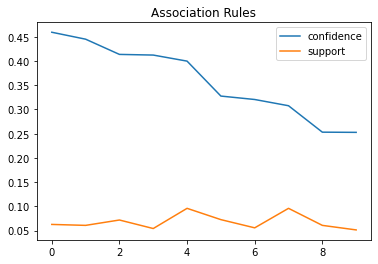

In [189]:
sorted_rules[['confidence','support']].plot(title='Association Rules');

/home/agala/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


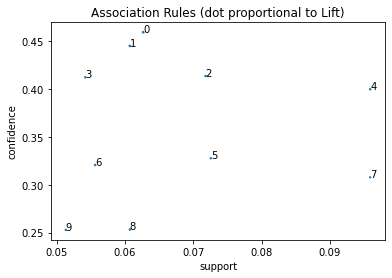

In [192]:
import matplotlib.pyplot as plt 
# 1.8 is chosen empirically to obtain the best graphical effect
s = [1.8**n for n in rules.lift]

fig, ax = plt.subplots()
ax.set_xlabel("support")
ax.set_ylabel("confidence")

ax.set_title(label='Association Rules (dot proportional to Lift)')


for i, txt in enumerate(sorted_rules.index):
    ax.annotate(txt, (sorted_rules['support'][i], sorted_rules['confidence'][i]))

ax.scatter(sorted_rules['support'], sorted_rules['confidence'], s=s)